In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ticktack
from ticktack import fitting
import os
from matplotlib.lines import Line2D
import matplotlib as mpl
mpl.style.use('seaborn-colorblind')

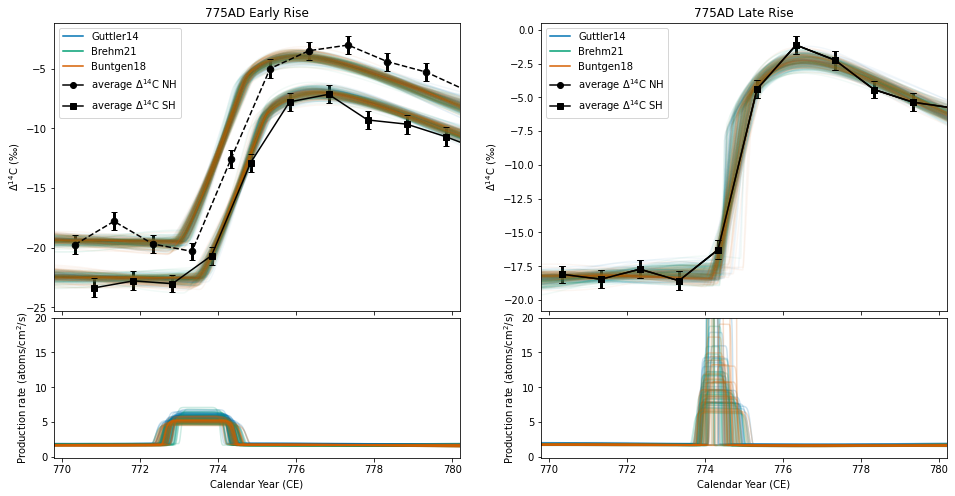

In [3]:
models = ["Guttler14", "Brehm21", "Buntgen18"]
fig = plt.figure(figsize=(16, 8))
spec = fig.add_gridspec(ncols=2, nrows=3)

ax0 = fig.add_subplot(spec[0:2, 0])
ax1 = fig.add_subplot(spec[2, 0], sharex=ax0)

events = ["775AD-early-N", "775AD-early-S"]
offsets = [4/12, 10/12]
H = ["north", "south"]
colors = mpl.rcParams['axes.prop_cycle'].by_key()['color']
fmts = [["ok", "--k"], ["sk", "-k"]]
size = 100
size2 = 30

for i, event in enumerate(events):
    for j, model in enumerate(models):
        cbm = ticktack.load_presaved_model(model, production_rate_units = 'atoms/cm^2/s')
        sf = fitting.SingleFitter(cbm, cbm_model=model, hemisphere="north")
        sf.load_data("data/means/" + event + ".csv")
        chain = np.load("chain/775AD-early_" + model + ".npy")
        sf.compile_production_model(model="flexible_sinusoid_affine_variant")
        sf.time_offset = offsets[i]

        idx = np.random.randint(len(chain), size=size)
        for param in chain[idx]:
            ax0.plot(sf.time_data_fine + sf.time_offset, sf.dc14_fine(params=param), alpha=0.05, color=colors[j])

        ax0.set_ylabel("$\Delta^{14}$C (‰)")
        fig.subplots_adjust(hspace=0.05)

        for param in chain[idx][:30]:
            ax1.plot(sf.time_data_fine, sf.production(sf.time_data_fine, *param), alpha=0.2, color=colors[j])
            
    ax0.errorbar(sf.time_data + sf.time_offset, sf.d14c_data, yerr=sf.d14c_data_error, fmt=fmts[i][0], capsize=3,
                 markersize=6.5, elinewidth=3, label="average $\Delta^{14}$C", alpha=1)
    ax0.plot(sf.time_data + sf.time_offset, sf.d14c_data, fmts[i][1], alpha=1)

custom_lines = [Line2D([0], [0], color=colors[0], lw=1.5, label=models[0]),
                Line2D([0], [0], color=colors[1], lw=1.5, label=models[1]),
                Line2D([0], [0], color=colors[2], lw=1.5, label=models[2]), 
                Line2D([0], [0], color="k", marker="o", lw=1.5, label="average $\Delta^{14}$C NH"), 
                Line2D([0], [0], color="k", marker="s", lw=1.5, label="average $\Delta^{14}$C SH")]

ax0.legend(handles=custom_lines)
ax1.set_ylim(-0.1, 20);
ax1.set_xlabel("Calendar Year (CE)");
ax1.set_xlim(sf.start-0.2, sf.end+0.2);
ax1.set_ylabel("Production rate (atoms/cm$^2$/s)");
ax0.set_title("775AD Early Rise");
plt.setp(ax0.get_xticklabels(), visible=False);

ax2 = fig.add_subplot(spec[0:2, 1])
ax3 = fig.add_subplot(spec[2, 1], sharex=ax2)

for j, model in enumerate(models):
    cbm = ticktack.load_presaved_model(model, production_rate_units = 'atoms/cm^2/s')
    sf = fitting.SingleFitter(cbm, cbm_model=model, hemisphere="north")
    sf.load_data("data/means/775AD-late-N.csv")
    chain = np.load("chain/775AD-late-N_" + model + ".npy")
    sf.compile_production_model(model="flexible_sinusoid_affine_variant")

    idx = np.random.randint(len(chain), size=size)
    params = np.zeros((size, chain[0].size))
    d14cs = np.zeros((size, sf.time_data_fine.size))
    params[:, :] = chain[idx]
    for k in range(size):
        dc14 = sf.dc14_fine(params=params[k, :])
        d14cs[k, :] = dc14

    for d14c in d14cs:
        ax2.plot(sf.time_data_fine + sf.time_offset, d14c, alpha=0.05, color=colors[j])

    ax2.set_ylabel("$\Delta^{14}$C (‰)")
    fig.subplots_adjust(hspace=0.05)

    for param in params[:size2]:
        production_rate = sf.production(sf.time_data_fine, *param)
        ax3.plot(sf.time_data_fine, production_rate, alpha=0.2, color=colors[j])

    ax2.errorbar(sf.time_data + sf.time_offset, sf.d14c_data, yerr=sf.d14c_data_error, fmt=fmts[i][0], capsize=3,
             markersize=6.5, elinewidth=3, label="average $\Delta^{14}$C", alpha=1)
    ax2.plot(sf.time_data + sf.time_offset, sf.d14c_data, fmts[i][1], alpha=1)

custom_lines = [Line2D([0], [0], color=colors[0], lw=1.5, label=models[0]),
                Line2D([0], [0], color=colors[1], lw=1.5, label=models[1]),
                Line2D([0], [0], color=colors[2], lw=1.5, label=models[2]), 
                Line2D([0], [0], color="k", marker="o", lw=1.5, label="average $\Delta^{14}$C NH"), 
                Line2D([0], [0], color="k", marker="s", lw=1.5, label="average $\Delta^{14}$C SH")]

ax2.legend(handles=custom_lines)
ax3.set_ylim(-0.1, 20);
ax3.set_xlabel("Calendar Year (CE)");
ax3.set_xlim(sf.start-0.2, sf.end+0.2);
ax3.set_ylabel("Production rate (atoms/cm$^2$/s)");
ax2.set_title("775AD Late Rise");
plt.setp(ax2.get_xticklabels(), visible=False);
plt.savefig("plots/overplots/775AD-NS.jpg")